<a href="https://colab.research.google.com/github/akhilerla/IT496/blob/main/AKhil_E_A4_Pareto_Chart_of_Top_for_IT_Skills_Competencies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas  as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
df = pd.read_csv("/content/drive/MyDrive/Skills.csv")
print(df)

                  skills  frequency
0           data science         80
1       Machine learning         76
2   Frontend development          7
3    Backend development          6
4                 Devops          8
5                     AI          8
6                Bigdata          7
7             salesforce          2
8                     VR          1
9  Block Chain developer          1


In [7]:
df.index = df['skills']
df = df.sort_values(by= 'frequency' ,ascending = False)
print(df)

                                      skills  frequency
skills                                                 
data science                    data science         80
Machine learning            Machine learning         76
Devops                                Devops          8
AI                                        AI          8
Frontend development    Frontend development          7
Bigdata                              Bigdata          7
Backend development      Backend development          6
salesforce                        salesforce          2
VR                                        VR          1
Block Chain developer  Block Chain developer          1


In [8]:
df["cumulativePercentage"] = df["frequency"].cumsum()/df["frequency"].sum()*100
df["cumulativePercentage"] = df["cumulativePercentage"].apply(lambda x:round(x,2))
print(df)

                                      skills  frequency  cumulativePercentage
skills                                                                       
data science                    data science         80                 40.82
Machine learning            Machine learning         76                 79.59
Devops                                Devops          8                 83.67
AI                                        AI          8                 87.76
Frontend development    Frontend development          7                 91.33
Bigdata                              Bigdata          7                 94.90
Backend development      Backend development          6                 97.96
salesforce                        salesforce          2                 98.98
VR                                        VR          1                 99.49
Block Chain developer  Block Chain developer          1                100.00


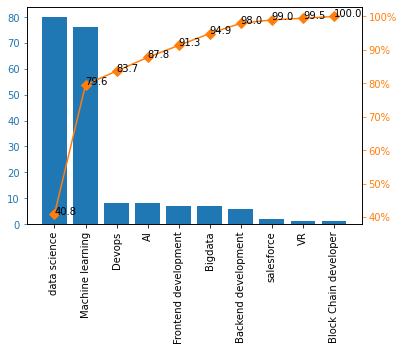

In [9]:
fig, ax = plt.subplots()
ax.bar(df.index, df["frequency"], color="C0")
ax.set_xticklabels(df['skills'], rotation=90)
ax2=ax.twinx()
ax2.plot(df.index, df["cumulativePercentage"], color="C1", marker="D", ms=7, label = df['cumulativePercentage'])
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

for index, v in df.iterrows():
  label = round(v['cumulativePercentage'],1)
  plt.annotate(label, xy =(v['skills'],v['cumulativePercentage']))

plt.show()